In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('palm.csv')

Finding the overall trend, through all waterings

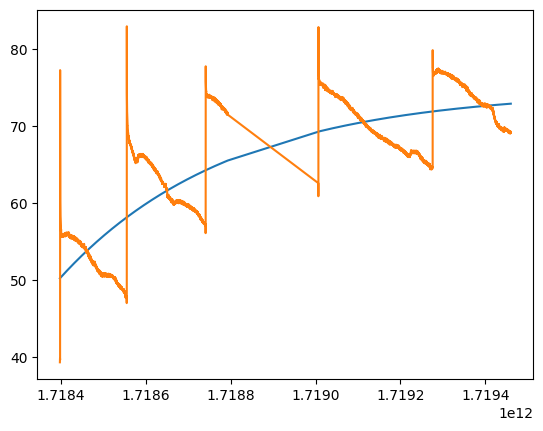

[-3.34787404e+01 -2.49002062e-09  7.46695236e+01  1.71827091e+12]
[[ 1.39864464e+13 -2.02580257e-07  4.94503766e+02  1.67451394e+20]
 [-2.02580257e-07  2.40754822e-21  7.27683617e-12 -2.42543876e+00]
 [ 4.94503766e+02  7.27683617e-12  2.59488307e-02  5.92029813e+09]
 [ 1.67451394e+20 -2.42543876e+00  5.92029813e+09  2.00479582e+27]]
0.7053210444687493


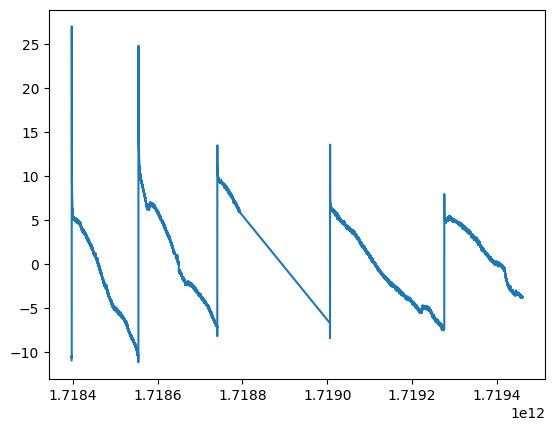

In [2]:

e = 2.718281828459045
def exp(x, a, b, c, t):
    return a * e**(b*(x-t))+c

#
# fit exp to soil_moisture_1

from scipy.optimize import curve_fit

popt, pcov = curve_fit(exp, df['time_stamp'], df['soil_moisture_1'], p0=[-20, -0.0000000008, 70, 1719463764000], maxfev=10000000)

plt.plot(df['time_stamp'], exp(df['time_stamp'], *popt))
plt.plot(df['time_stamp'], df['soil_moisture_1'])
plt.show()

print(popt)
print(pcov)

# r2
residuals = df['soil_moisture_1'] - exp(df['time_stamp'], *popt)
ss_res = sum(residuals**2)
ss_tot = sum((df['soil_moisture_1']-df['soil_moisture_1'].mean())**2)
r2 = 1 - (ss_res / ss_tot)
print(r2)

# plot the residuals
plt.plot(df['time_stamp'], residuals)
plt.show()


In [3]:
# import palm_watering.csv and split the data into partition by last watered
df_w = pd.read_csv('palm_watering.csv')

df_w = df_w.sort_values('time_stamp')

# fill out the last watering date for each row
df['last_watered'] = df['time_stamp'].apply(lambda x: df_w[df_w['time_stamp'] < x]['time_stamp'].iloc[-1] if len(df_w[df_w['time_stamp'] < x]) > 0 else None)


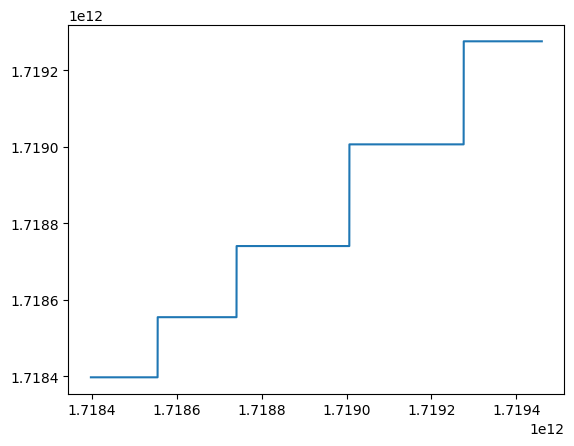

In [4]:
plt.plot(df['time_stamp'], df['last_watered'])

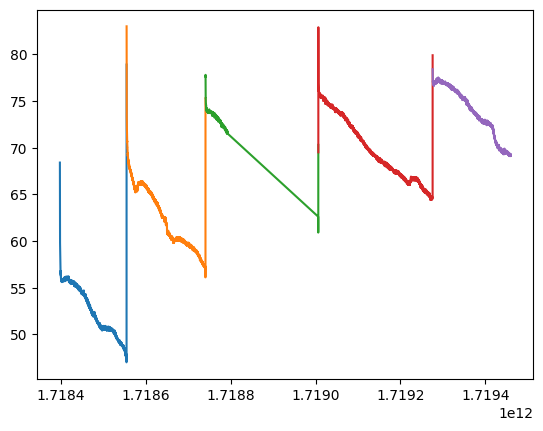

In [5]:
# group by last_watered and plot each group separately
for name, group in df.groupby('last_watered'):
    plt.plot(group['time_stamp'], group['soil_moisture_1'])



In [6]:
# get peak moisture for each watering (only consider first hour)
# so, each group of "last_watered" will have the same peak moisture
# but the peak moisture is only determined by the first hour in that group
# we do this using a lambda function that finds the max in that group's first hour

df['peak_moisture'] = df['last_watered'].apply(lambda x: df[df['last_watered'] == x].iloc[0:60]['soil_moisture_1'].max() if x is not None else None)

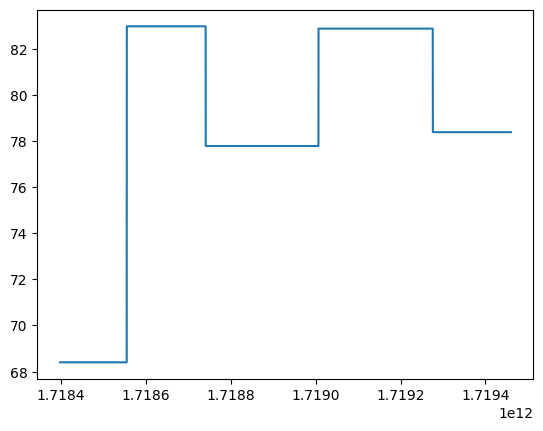

In [7]:
plt.plot(df['time_stamp'], df['peak_moisture'])